In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn import datasets

In [47]:
iris = datasets.load_iris()
irisdata = iris.data
irisdata


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [45]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

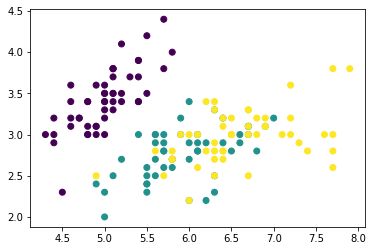

In [5]:
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)

In [25]:
precision = np.linalg.inv(np.cov(iris.data.T))

In [16]:
np.cov(iris.data.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

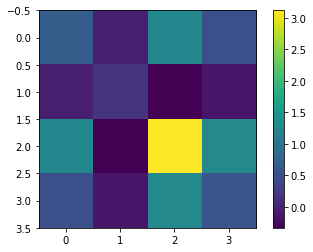

In [18]:
plt.imshow(np.cov(iris.data.T))
plt.colorbar()

In [26]:
mean0, mean1, mean2, mean3 = np.mean(iris.data, axis=0)
mean = np.mean(iris.data, axis=0)

In [29]:
def irisdensity(x):
    return scipy.stats.multivariate_normal.pdf( x, mean, precision)

In [42]:
irisdensity(mean)

0.0011078145386904578

In [39]:
xgrid = np.arange(4.5,8, 0.1)  # range for feature 1
ygrid = np.arange(2,4.5, 0.1)  # range for feature 2 
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i],  ygrid[j], mean2, mean3])
       # print(x)
        z[i,j]= irisdensity(x)
print(z.shape)

(35, 25) (35, 25) (35, 25)
(35, 25)


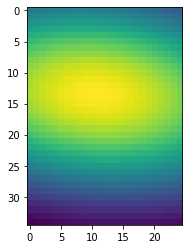

In [40]:
plt.imshow(z)

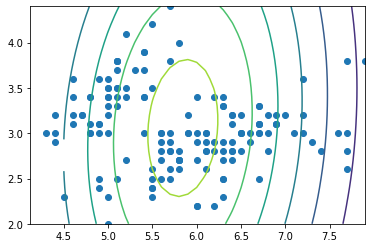

In [48]:
plt.contour(xax, yax, z)
plt.scatter(irisdata[:,0], irisdata[:,1])

In [67]:
sp0data = irisdata[iris.target == 0]
sp1data = irisdata[iris.target == 1]
sp2data = irisdata[iris.target == 2]
sp0data.shape, sp1data.shape, sp2data.shape

((50, 4), (50, 4), (50, 4))

In [70]:
meansp0 = np.mean(sp0data, axis=0)
meansp1 = np.mean(sp1data, axis=0)
meansp2 = np.mean(sp2data, axis=0)

In [71]:
meansp0.shape

(4,)

In [56]:
len(sp0data), len(sp1data), len(sp2data)

(50, 50, 50)

In [73]:
len(meansp0), len(meansp1), len(meansp2)

(4, 4, 4)

In [74]:
covsp0 = np.cov(sp0data.T); precissp0 = np.linalg.inv(covsp0)
covsp1 = np.cov(sp1data.T); precissp1 = np.linalg.inv(covsp1)
covsp2 = np.cov(sp2data.T); precissp2 = np.linalg.inv(covsp2)

In [75]:
val, vec = np.linalg.eig(covsp2)

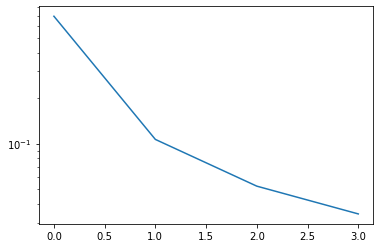

In [76]:
plt.semilogy(np.abs(val))

In [77]:
covsp2

array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
       [0.09376327, 0.10400408, 0.07137959, 0.04762857],
       [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
       [0.04909388, 0.04762857, 0.04882449, 0.07543265]])

In [93]:
def irisdensity3(x):
    d1 = scipy.stats.multivariate_normal.pdf( x, meansp0,covsp0 )
    return d1

In [96]:
xgrid = np.arange(4.5,8, 0.1)  # range for feature 1
ygrid = np.arange(2,4.5, 0.1)  # range for feature 2 
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i],  ygrid[j], meansp0[2], meansp0[3]])
       # print(x)
        z[i,j]= irisdensity3(x)
print(z.shape)

(35, 25) (35, 25) (35, 25)
(35, 25)


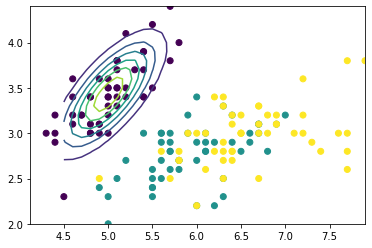

In [97]:
plt.contour(xax, yax, z)
plt.scatter(irisdata[:,0], irisdata[:,1], c=iris.target)

In [ ]:
# Various problems when trying to implement this the first time:
# Can't invert singular 50x50 matrix 
# Multivariate gaussian has no correlations (?!?!)
# Multivariate gaussian is centered in the wrong place. 

# This graph reassures me that I can design a 
# multivariate gaussian with class-conditional data.
# I would like to take a step back and turn my 
# hard-coded variable names into vectors if I can.
# (Why??)